# Project Planning Stage (Individual)  
**Nicholas Liu** | **Group 33**

## GitHub Repository  
https://github.com/naldonymous/dsci-100-2025w1-group-33.git

In [1]:
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
download.file("https://raw.githubusercontent.com/naldonymous/dsci-100-2025w1-group-33/refs/heads/main/players.csv", "players.csv")
download.file("https://raw.githubusercontent.com/naldonymous/dsci-100-2025w1-group-33/refs/heads/main/sessions.csv", "sessions.csv")

## Data Description

Source: https://plaicraft.ai/

Data collected through self-declaration by player and logging activity on server.

The dataset:

In [3]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


A lot of players aged 17 and 21. And, 4 out of 6 have less than 1 hour played.

In [4]:
sessions <- read_csv("sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The dataset includes two files, `players.csv` and `sessions.csv`.

`players.csv` includes information about each player, with 7 variables:

|Variable|Type|Description
|-----------|-------|------------|
|experience|character|The player's experience level|
|subscribe|logical|If the player is subscribed to a game-related newsletter|
|hashedEmail|character|Unique hashed email of player|
|played_hours|double|Hours player has played|
|name|character|First name of player|
|gender|character|Gender of player|
|Age|double|Age of player (years)|

`sessions.csv` includes player activity, with 5 variables.

|Variable|Type|Description
|-----------|-------|------------|
|hashedEmail|character|Unique hashed email of player|
|start_time|character|Date and time of when the session started|
|end_time|character|Date and time of when the session ended|
|original_start_time|double|Start time of the session in UNIX format (ms)|
|original_end_time|double|End time of the session in UNIX format (ms)|

The number of observations in each file.

In [5]:
obsPlayers <- summarize(players, count = n()) |> pull(count)
obsSessions <- summarize(sessions, count = n()) |> pull(count)
print(paste("Number of Observations in Players:", obsPlayers))
print(paste("Number of Observations in Sessions:", obsSessions))

[1] "Number of Observations in Players: 196"
[1] "Number of Observations in Sessions: 1535"


Now, let's see how many players are either 17 or 21 in `players.csv`.

In [6]:
playersFilteredSeventeen <- filter(players, Age == 17)
playersFilteredTwentyOne <- filter(players, Age == 21)

obsplayersFilteredSeventeen <- summarize(playersFilteredSeventeen, count = n()) |> pull(count)
obsplayersFilteredTwentyOne <- summarize(playersFilteredTwentyOne, count = n()) |> pull(count)

obsplayersFilteredSeventeen
obsplayersFilteredTwentyOne
total <- (obsplayersFilteredSeventeen) / obsPlayers * 100
print(paste("Percentage of players that are 17 years old:", total))

[1] 73

[1] 18

[1] "Percentage of players that are 17 years old: 37.2448979591837"


This may lead to problems in the future (addressed more in Methods and Plan section).

Players that have have played 0 hours, and 0 to 1 hours.

In [7]:
playersNoPlay <- filter(players, played_hours == 0)
playersLessPlay <- filter(players, played_hours <= 1)

obsPlayersNoPlay <- summarize(playersNoPlay, count = n()) |> pull(count)
obsPlayersLessPlay <- summarize(playersLessPlay, count = n()) |> pull(count)

print(paste("Number of players with zero hours played:", obsPlayersNoPlay))
print(paste("Number of players with zero to one hours played:", obsPlayersLessPlay))

[1] "Number of players with zero hours played: 85"
[1] "Number of players with zero to one hours played: 160"


Again, this may lead to problems in the future (addressed more in Methods and Plan section). Next up, we need to find the summary statistics.

In [8]:
summarizedPlayers <- summary(players)
summarizedPlayers

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [9]:
summarizedSessions <- summary(sessions)
summarizedSessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

The means:

For `players.csv`:
|Variable|Mean
|-------|-------|
|played_hours|5.85|
|Age|21.14|

For `sessions.csv`:
|Variable|Mean
|-------|-------|
|original_start_time|1.72e+12|
|original_end_time|1.72e+12|

## Questions:

I will address the **broad question of interest** of:

***What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?***

My specific question will be:
**Can a player's age and hours played predict whether a player is subscribed to a game-related newsletter in `players.csv`?**

I will work with the dataset `players.csv`.

I plan to select the played_hours, Age, and subscribe columns of `players`, and graph the relationship between them to see if anything could be found as part of an exploratory data analysis and visualization section.

## Exploratory Data Analysis and Visualization

Let's look at `players`:

In [10]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


It seems pretty tidy already. Each row is an observation, each column is a variable, and each value is a single cell.

Select columns:

In [11]:
playersSelect <- select(players, played_hours, Age, subscribe)
head(playersSelect)

played_hours,Age,subscribe
<dbl>,<dbl>,<lgl>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
0.0,17,TRUE


In [12]:
colnames(playersSelect) <- c("played_hours", "age", "subscribe")
head(playersSelect)

played_hours,age,subscribe
<dbl>,<dbl>,<lgl>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
0.0,17,TRUE


Players provide their own ages, some may not have provided that data.

In [13]:
summarizedPlayers

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

`Age` has 2 NA's, which isn't very consequential.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


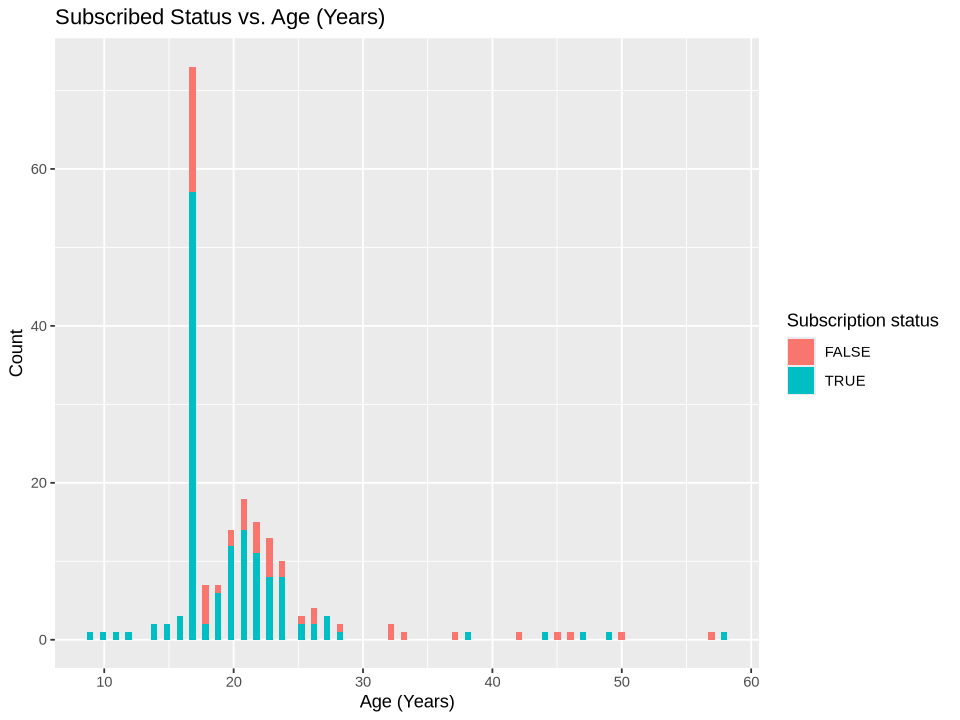

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersPlot <- ggplot(playersSelect, aes(x = age, fill = subscribe)) +
    geom_histogram(bins = 100) +
    labs(x = "Age (Years)", y = "Count", fill = "Subscription status") +
    ggtitle(label = "Subscribed Status vs. Age (Years)")
playersPlot

It seems like the majority of people are subscribed, so any splitting of test and training data sets will have to have high splits of status. This makes the bias towards 17 year old users much more apparent visually.

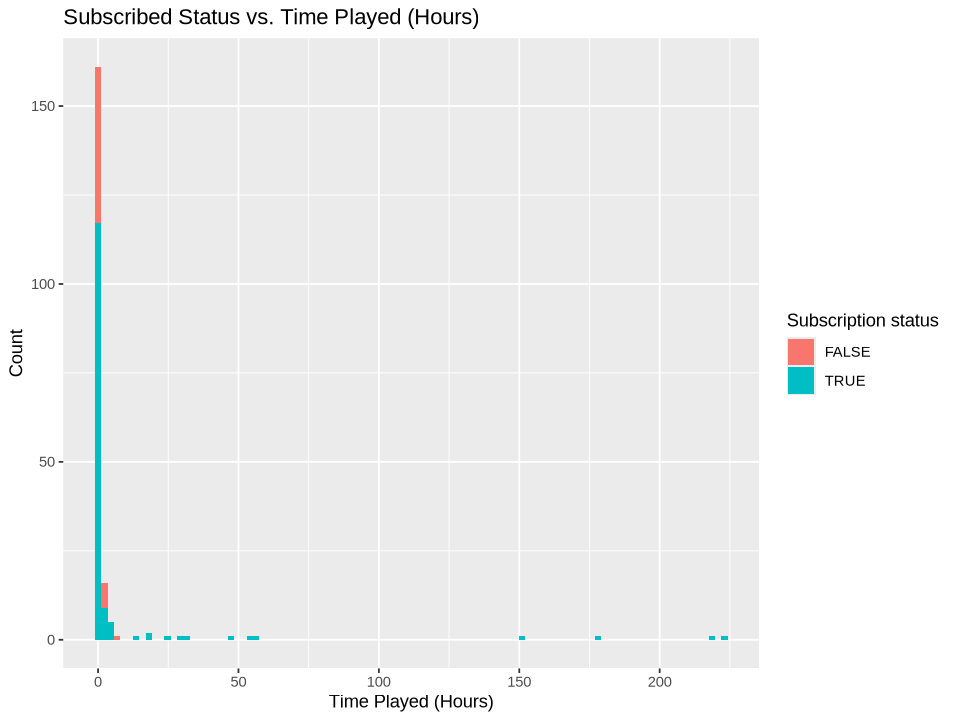

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersTimePlot <- ggplot(playersSelect, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 100) +
    labs(x = "Time Played (Hours)", y = "Count", fill = "Subscription status") +
    ggtitle(label = "Subscribed Status vs. Time Played (Hours)")
playersTimePlot

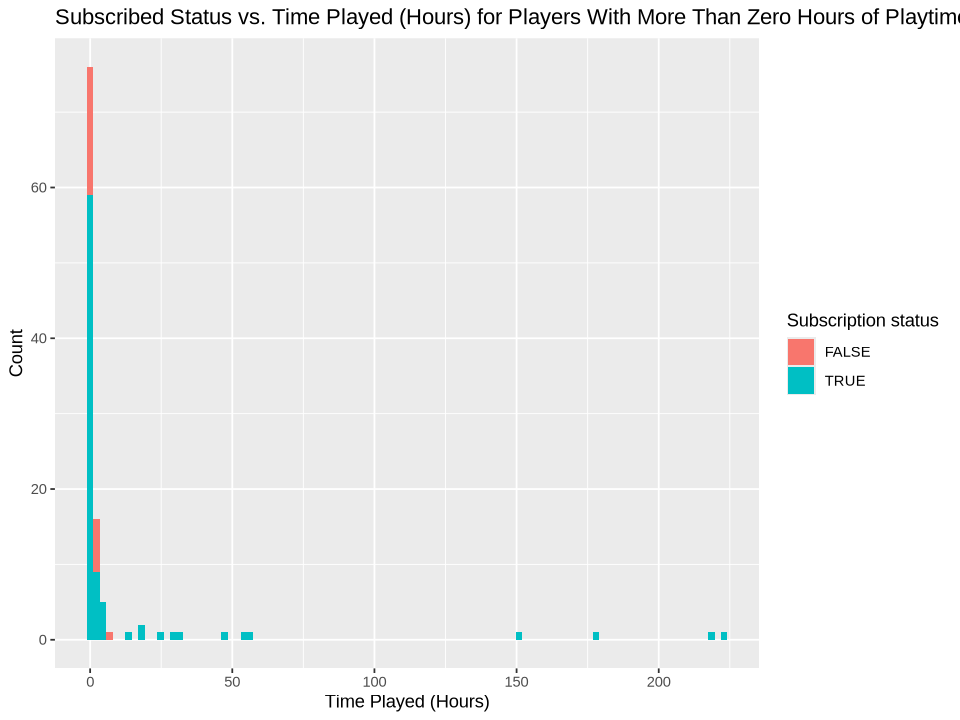

In [16]:
playersWhoActuallyPlay <- filter(playersSelect, played_hours > 0)
options(repr.plot.width = 8, repr.plot.height = 6)
playersTimePlotBetter <- ggplot(playersWhoActuallyPlay, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 100) +
    labs(x = "Time Played (Hours)", y = "Count", fill = "Subscription status") +
    ggtitle(label = "Subscribed Status vs. Time Played (Hours) for Players With More Than Zero Hours of Playtime")

playersTimePlotBetter

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


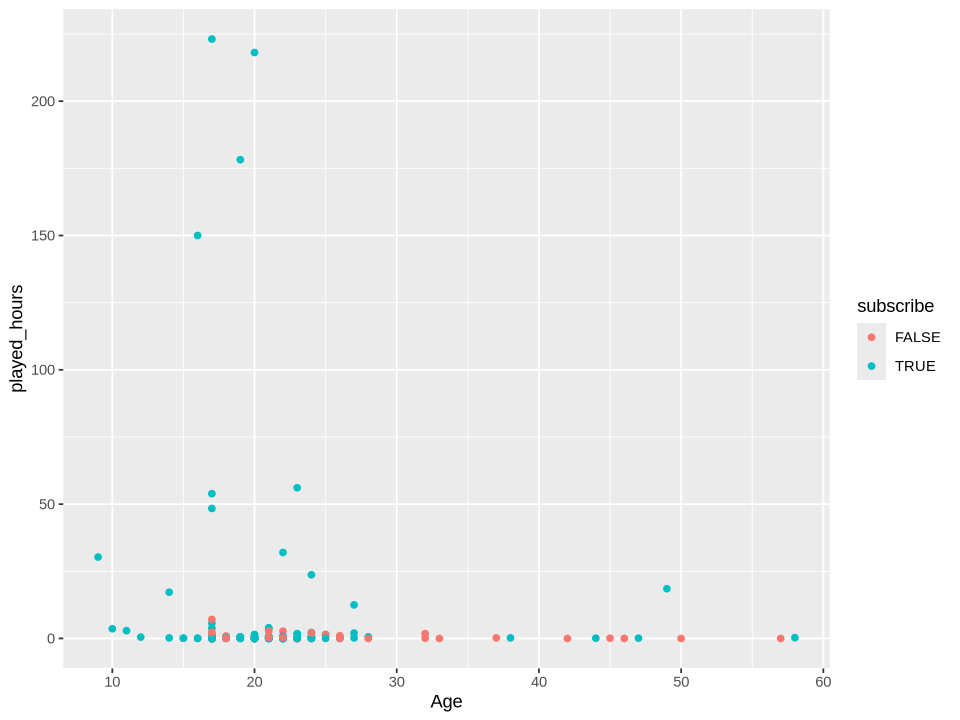

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)
playersScatterPlot <- ggplot(playersSelect, aes(x = age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age")
playersScatterPlot

## Methods and Plan

Looking at the data, I will use k-nearest neighbours (knn) classification. This method is appropriate because subscribe, the response variable, is categorical and not numerical.

To apply knn classification, we have to make several assumptions and deal with possible limitations/weaknesses:
- Nearby observations should all be similar classes (otherwise it predictions will be poor)
- There shouldn't be too many predictor variables (kNN does a lot worse as the variables increase, only 2 in this case, should be fine)
- There should be enough data for solid training and testing
- The class distribution should be reasonably balanced for the dataset
- knn is sensitive to k (overfitting, underfitting, outliers)

I will have to do the appropriate preprocessing using the techniques learned in lecture and tutorials (step_center, step_scale all predictors). I will split the data after preprocessing, before training the model, into a training and testing set, with a split of 70/30. use the classic technique of finding the best amount of neighbours using tune(). I will use cross-validation for the training set to find the best value of k to avoid over/underfitting. The model with the best k will be used on the test set.
